In [1]:
from __future__ import print_function
import numpy as np
from keras.preprocessing import sequence
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, add, Concatenate, merge, Add,Bidirectional, Activation, concatenate
import keras.layers
import keras
import numpy
import glob, os
import pandas as pd
np.random.seed(7)  # for reproducibility

Using TensorFlow backend.


In [2]:
# Read all files in path and concatenate them (Is it a good pratice?)
path =r'../IAmelodyDNN' # use your path
allFiles = glob.glob(path + "/*mfcc.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None)
    list_.append(df)
frame = pd.concat(list_)

print(frame.shape)

(3241, 120)


In [3]:
df1=pd.read_csv("MusicDelta_Rockabilly_mfcc.csv",header=None)
df2=pd.DataFrame.as_matrix(df1)
print (df2.shape)
df2 = df2 - df2.mean()
df2 = df2 / df2.var()**2

df3=pd.read_csv("MusicDelta_Rockabilly_labels.csv",header=None)
df4=pd.DataFrame.as_matrix(df3)
df4[df4 > 0] = 1
print (df4.shape)

(3241, 120)
(3241, 1)


In [4]:
# create data
#x_train = np.random.random((1000, 120))
#y_train = np.random.randint(2, size=(1000, 1))

x_train = df2
y_train = df4

x_test = np.random.random((100, 120))
y_test = np.random.randint(2, size=(100, 1))

max_features = 120
maxlen = 120
batch_size = 10

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 50, input_length=maxlen))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# SGD optimizer?
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd)

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

# Use 30 epochs for real training
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1, 
          validation_split=0.2)

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train...
Train on 3241 samples, validate on 100 samples
Epoch 1/1
100/100 [==============================] - 1s     

acc: 43.00%


In [5]:
# calculate predictions
predictions = model.predict(x_train)
print(predictions)

[[ 0.56790757]
 [ 0.58273798]
 [ 0.59375262]
 ..., 
 [ 0.43127155]
 [ 0.43127155]
 [ 0.43127155]]


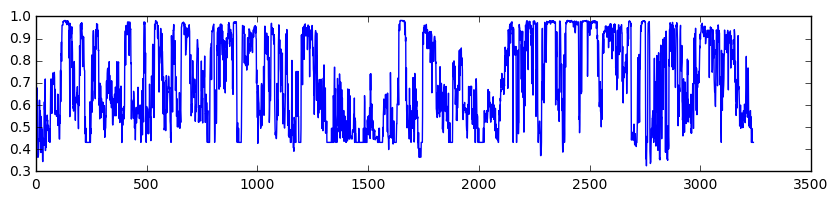

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the grid
plt.figure(figsize=(10,2))
plt.plot(predictions)
plt.show()

In [8]:
# Activation output - need to be 0.5
predictions[predictions<0.5] = 0
predictions[predictions>=0.5] = 1

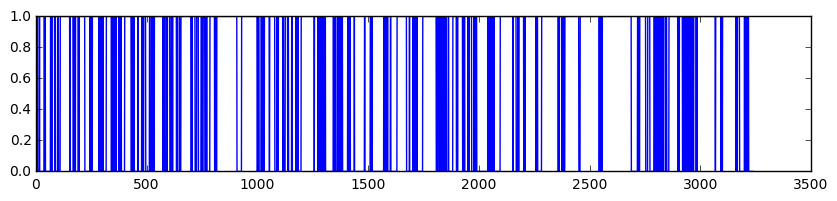

In [11]:
plt.figure(figsize=(10,2))
plt.plot(predictions)
plt.show()

In [13]:
# Write features file 
import csv
with open('VADresult.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    col = len(predictions)
    for i in range(col):
        spamwriter.writerow(predictions[i])